In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
data1=pd.read_excel('/content/drive/MyDrive/All 10 freelane-webs.xlsx')
data1.head(3)

,Jobs,Job Type,Salary
0,mysql,Remote,$125
1,iphoneappdev,Remote,$351
2,seo,Remote,$35


In [ ]:
df=data1.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Jobs      1238 non-null   object
 1   Job Type  1237 non-null   object
 2   Salary    1236 non-null   object
dtypes: object(3)
memory usage: 29.1+ KB


In [ ]:
df.describe()

,Jobs,Job Type,Salary
count,1238,1237,1236
unique,102,95,651
top,SE,Remote,$485
freq,133,756,262


In [ ]:
df.isna().sum()

Jobs        0
Job Type    1
Salary      2
dtype: int64

In [ ]:
df['Jobs'].count()

1238

In [ ]:
df['Jobs'].unique()

array(['mysql', 'iphoneappdev', 'seo', 'js', 'php', 'photoshop',
       'reactjs', 'nodejs', 'mobileappdev', 'androiddevloper', 'laravel',
       'ML', 'graphicdesign', 'c++', 'c', 'html', 'angular', 'wordpress',
       'android', 'java', 'jquery', 'webscraping', 'word', 'css',
       'ecommerce', 'spring', 'flutter', 'db', 'ux', 'unittesting',
       'mongodb', 'testing', 'webdesigner', 'softwaretesting',
       'softwaredevloper', 'gamedev', 'python', 'reactnative', 'AI',
       '.net', 'adobeillustrator', 'ui', 'qa', 'qc', 'SE', 'se',
       'fullstack', 'devops', 'backend', 'unity', 'gamedesigner',
       'dataanalyst', 'webdevloper', 'pm', 'DL', 'frontend',
       'graphicdesigner', 'php ', 'softwaredev', 'webanalyst', 'ios',
       'softwaredeveloper', 'cloudengr', 'softwaretester', 'woocommerce',
       'vue', 'excel', 'frontend ', 'Java Spring', 'django',
       'graphicsdesign', 'mobile website design', 'shopify design',
       'android design', 'mobileapplicationdevloper', 'e

In [ ]:
a = df['Jobs'].unique()
a

array(['mysql', 'iphoneappdev', 'seo', 'js', 'php', 'photoshop',
       'reactjs', 'nodejs', 'mobileappdev', 'androiddevloper', 'laravel',
       'ML', 'graphicdesign', 'c++', 'c', 'html', 'angular', 'wordpress',
       'android', 'java', 'jquery', 'webscraping', 'word', 'css',
       'ecommerce', 'spring', 'flutter', 'db', 'ux', 'unittesting',
       'mongodb', 'testing', 'webdesigner', 'softwaretesting',
       'softwaredevloper', 'gamedev', 'python', 'reactnative', 'AI',
       '.net', 'adobeillustrator', 'ui', 'qa', 'qc', 'SE', 'se',
       'fullstack', 'devops', 'backend', 'unity', 'gamedesigner',
       'dataanalyst', 'webdevloper', 'pm', 'DL', 'frontend',
       'graphicdesigner', 'php ', 'softwaredev', 'webanalyst', 'ios',
       'softwaredeveloper', 'cloudengr', 'softwaretester', 'woocommerce',
       'vue', 'excel', 'frontend ', 'Java Spring', 'django',
       'graphicsdesign', 'mobile website design', 'shopify design',
       'android design', 'mobileapplicationdevloper', 'e

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Jobs')

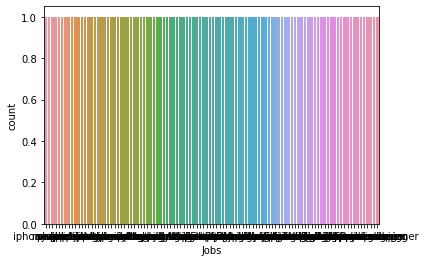

In [ ]:
sns.countplot(x = a, data = df)
plt.xlabel('Jobs')

Text(0.5, 0, 'Job Type')

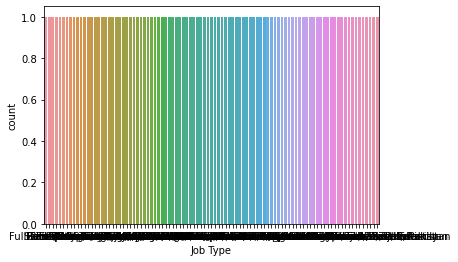

In [ ]:
c = df['Job Type'].unique()
sns.countplot(x = c, data = df)
plt.xlabel('Job Type')

In [ ]:
df1 = len(df['Job Type'].dropna())
df1

1237

In [ ]:
df2 = len(df['Jobs'].dropna())
df2

1238

In [ ]:
df3 = len(df['Salary'].dropna())
df3

1236

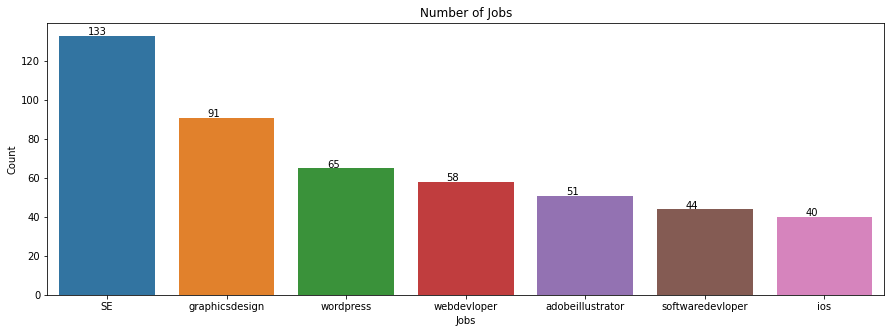

In [ ]:
country_data=df.groupby('Jobs').size().sort_values(ascending=False).head(7)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(15,5))
_ = plt.title('Number of Jobs')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Jobs')
_ = plt.ylabel('Count')

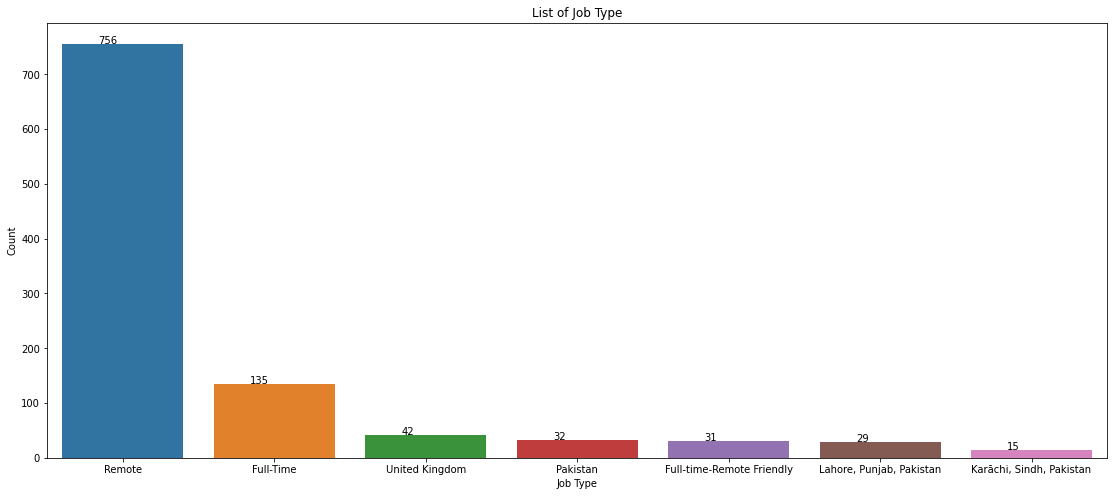

In [ ]:
country_data=df.groupby('Job Type').size().sort_values(ascending=False).head(7)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(19,8))
_ = plt.title('List of Job Type')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Job Type')
_ = plt.ylabel('Count')

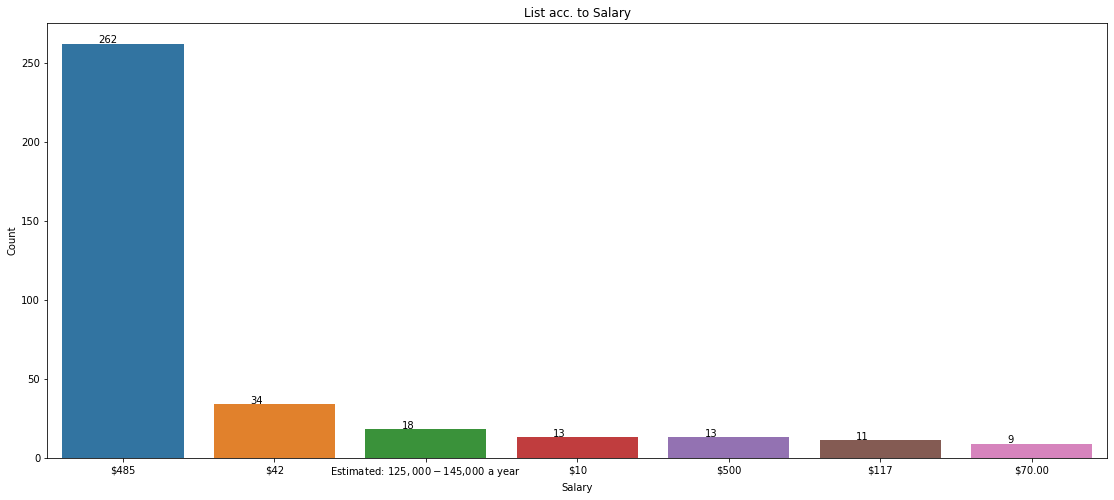

In [ ]:
country_data=df.groupby('Salary').size().sort_values(ascending=False).head(7)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(19,8))
_ = plt.title('List acc. to Salary')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Salary')
_ = plt.ylabel('Count')

In [ ]:
import plotly.express as px

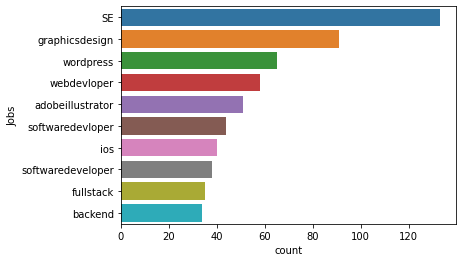

In [ ]:
sns.countplot(y=df.Jobs,order=df.Jobs.value_counts().iloc[:10].index)
# plt.xticks(rotation=90)
plt.show()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df.Jobs.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


['mysql']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.319*"se" + 0.140*"ios" + 0.078*"ecommerce" + 0.078*"fullstack" + '
  '0.071*"androiddevloper" + 0.040*"appdevloper" + 0.024*"php" + 0.024*"mysql" '
  '+ 0.024*"softwaretester" + 0.024*"excel"'),
 (1,
  '0.439*"graphicsdesign" + 0.138*"fullstack" + 0.092*"qc" + 0.075*"html" + '
  '0.029*"webdesignerer" + 0.029*"flutter" + 0.024*"js" + 0.018*"ui" + '
  '0.018*"devops" + 0.012*"mongodb"'),
 (2,
  '0.221*"se" + 0.094*"wordpress" + 0.087*"webdevloper" + 0.087*"woocommerce" '
  '+ 0.074*"reactjs" + 0.074*"jquery" + 0.054*"backend" + 0.054*"seo" + '
  '0.054*"python" + 0.021*"js"'),
 (3,
  '0.173*"frontend" + 0.111*"html" + 0.111*"nodejs" + 0.071*"mysql" + '
  '0.071*"backend" + 0.071*"php" + 0.056*"android" + 0.032*"wordpress" + '
  '0.032*"ai" + 0.024*"se"'),
 (4,
  '0.358*"webdevloper" + 0.135*"ux" + 0.054*"graphicdesigner" + 0.046*"js" + '
  '0.037*"se" + 0.037*"photoshop" + 0.028*"backend" + 0.028*"android" + '
  '0.028*"java" + 0.019*"wordpress"'),
 (5,
  '0.338*"se" + 0.143*"

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.8 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/LDAdataprep'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/LDA_Results'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.043232  0.254416       1        1  12.507935
1      0.364610 -0.061034       2        1  12.284314
6     -0.144392 -0.285425       3        1  11.269693
4     -0.155157 -0.109190       4        1  10.980837
8      0.115673  0.038639       5        1  10.283178
7     -0.096379  0.057653       6        1   9.986605
0     -0.028185  0.171783       7        1   8.503814
3      0.052580 -0.018530       8        1   8.345417
9      0.119934 -0.088276       9        1   7.955235
2     -0.185451  0.039965      10        1   7.882973, topic_info=              Term        Freq       Total Category  logprob  loglift
61  graphicsdesign   80.000000   80.000000  Default  30.0000  30.0000
40              se  112.000000  112.000000  Default  29.0000  29.0000
47     webdevloper   58.000000   58.000000  Default  28.0000  28.0000
15       wordpress   58.000000   58.000000  Default  27.0000  27.0000
54             ios   42.000000   42.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
61  graphicsdesign    0.060581   80.544404  Topic10  -7.2817  -4.6521
54             ios    0.059527   42.882123  Topic10  -7.2993  -4.0393
4              php    0.059396   32.886824  Topic10  -7.3015  -3.7761
41       fullstack    0.059347   28.280292  Topic10  -7.3023  -3.6261
0            mysql    0.059306   32.137973  Topic10  -7.3030  -3.7546

[433 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
71        4  0.480527      adobe
35        8  0.767075         ai
16        4  0.168958    android
16        6  0.394234    android
16        8  0.281596    android
...     ...       ...        ...
15        4  0.033909  wordpress
15        6  0.016955  wordpress
15        8  0.050864  wordpress
15        9  0.050864  wordpress
15       10  0.135636  wordpress

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 7, 5, 9, 8, 1, 4, 10, 3])

In [ ]:
for Jobs, topic in lda_model.show_topics(num_topics=20,num_words=10):
   print('\nJob: {} iteration: {}\n'.format(Jobs, topic))


Job: 0 iteration: 0.319*"se" + 0.140*"ios" + 0.078*"ecommerce" + 0.078*"fullstack" + 0.071*"androiddevloper" + 0.040*"appdevloper" + 0.024*"php" + 0.024*"mysql" + 0.024*"softwaretester" + 0.024*"excel"


Job: 1 iteration: 0.439*"graphicsdesign" + 0.138*"fullstack" + 0.092*"qc" + 0.075*"html" + 0.029*"webdesignerer" + 0.029*"flutter" + 0.024*"js" + 0.018*"ui" + 0.018*"devops" + 0.012*"mongodb"


Job: 2 iteration: 0.221*"se" + 0.094*"wordpress" + 0.087*"webdevloper" + 0.087*"woocommerce" + 0.074*"reactjs" + 0.074*"jquery" + 0.054*"backend" + 0.054*"seo" + 0.054*"python" + 0.021*"js"


Job: 3 iteration: 0.173*"frontend" + 0.111*"html" + 0.111*"nodejs" + 0.071*"mysql" + 0.071*"backend" + 0.071*"php" + 0.056*"android" + 0.032*"wordpress" + 0.032*"ai" + 0.024*"se"


Job: 4 iteration: 0.358*"webdevloper" + 0.135*"ux" + 0.054*"graphicdesigner" + 0.046*"js" + 0.037*"se" + 0.037*"photoshop" + 0.028*"backend" + 0.028*"android" + 0.028*"java" + 0.019*"wordpress"


Job: 5 iteration: 0.338*"se" + 0